# 1.9 OPA 比較器與施密特電路

# list expression  
## 1. 單向  
##    [f(x) for x in sequence if condition]  
## 2. 雙向  
##    [f(x) if condition else g(x) for x in sequence]


# 同相比較器電路
## 電路圖與公式
<img align="center" style="padding-right:10px;" src="figures\comparator1.png">

### 電路特性  

    提示:
\begin{equation}
V_o = \left\{
             \begin{array}{lr}
             V_{cc} ,   & if \; V_i > 0 \\
             -V_{cc} , &  if \; V_i  \leq 0  
             \end{array}
\right.
\end{equation}


### 波形圖

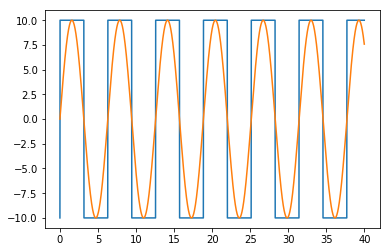

In [21]:
import matplotlib.pyplot as plt
import math

t = [0.02*i for i in range(2000)]
Vi = [10*math.sin(i) for i in t]

Vo = [10 if s >0 else -10 for s in Vi]
plt.plot(t,Vo,t,Vi)

### 轉換曲線

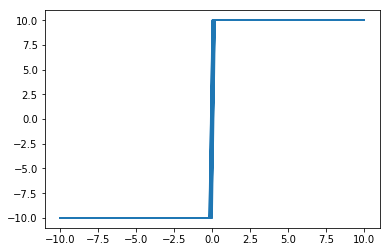

In [22]:
plt.plot(Vi, Vo)

# 反相施密特電路
## 電路圖與公式
<img align="center" style="padding-right:10px;" src="figures\schmit1.png">

### 電路特性  

    提示:
\begin{equation}
V_o = \left\{
             \begin{array}{lr}
             -V_{cc} ,   & if \; V_i > V_U \\
             V_{cc} , &  if \; V_i  < V_L \\
             不改變 ,   & 其他
             \end{array}
\right.
\end{equation}


### 波形圖

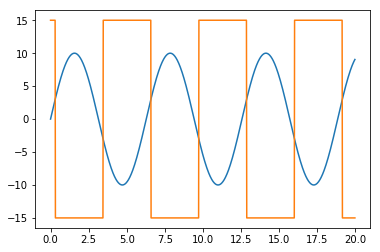

In [26]:
import matplotlib.pyplot as plt
import math

#施密特電路參數
Vcc = 15
Vx = Vcc  # OPA 內部狀態 (一般為未知，此處假設為 vcc)
R1 = 1
R2 = 4
beta = R2/(R1 + R2) #回授比

VU = beta * Vcc  #上限轉態電壓
VL = -beta*Vcc   #下限轉態電壓

t = [0.02*i for i in range(1000)]
Vi = [10*math.sin(i) for i in t]
Vo=[]
for x in Vi:
    if x > VU:
        Vx = -Vcc
    elif x < VL:
        Vx = Vcc
        
    Vo.append(Vx)

plt.plot(t,Vi, t,Vo)

### 轉換曲線

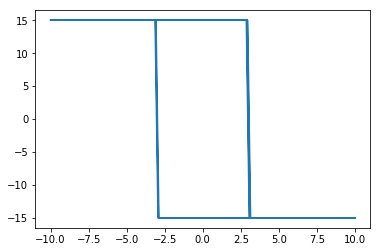

In [28]:
plt.plot(Vi,Vo)

# OPA方波產生電路
## 電路圖與公式
<img align="center" style="padding-right:10px;" src="figures\opa_square_generator.png">

### 電路特性  

$T=2RC*\ln \cfrac{1+\beta}{1-\beta}$

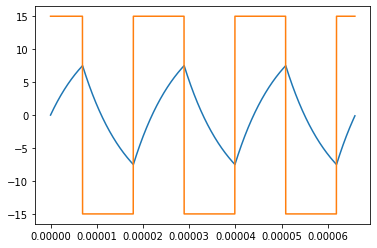

In [8]:
import matplotlib.pyplot as plt
import math

#施密特電路參數
Vcc = 15
Vx = Vcc  # OPA 內部狀態 (一般為未知，此處假設為 vcc)
R1 = 2
R2 = 2
beta = R2/(R1 + R2) #回授比

VU = beta * Vcc  #上限轉態電壓
VL = -beta*Vcc   #下限轉態電壓

#電路參數
R = 1
C = 10E-6
tau = R*C
T = 2*R*C*math.log((1+beta)/(1-beta))
#模擬參數
Ts = 3*T   #總模擬時間
N = 2500       #資料點個數
dt = Ts/N     #分析單位時間
#輸出入串列資料
T = [0]       #時間串列
Vc=[0]        #電容電壓
Vo=[Vcc]      #輸出電壓

for i in range(1,N):
    t = i*dt
    T.append(t)
    vc = Vc[i-1]+(Vo[i-1]-Vc[i-1])*(1-math.exp(-dt/tau))
    Vc.append(vc)
    if vc > VU:
        Vx = -Vcc
    elif vc < VL:
        Vx = Vcc        
    Vo.append(Vx)

plt.plot(T,Vc, T,Vo)


## 如何寫程式從輸出波形計算振盪週期。